IMPORT LIBRARIES 

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

IMORT DATASET

In [2]:
card=pd.read_csv("C:/Users/mansi/OneDrive/Documents/CAPSTONE_PROJECT_DATASETS/2_Credit_card_fraud_detection_PR2_BIA/creditcard.csv")

In [3]:
card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
card.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

DATA UNDERSTANDING

In [5]:
card.shape

(284807, 31)

In [6]:
card.size

8829017

In [7]:
card.duplicated().sum()

1081

In [8]:
card.drop_duplicates(inplace=True)

In [9]:
card.duplicated().sum()

0

In [10]:
card.isnull().sum().sum()

0

In [11]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


DATA VISUALIZATIONS 

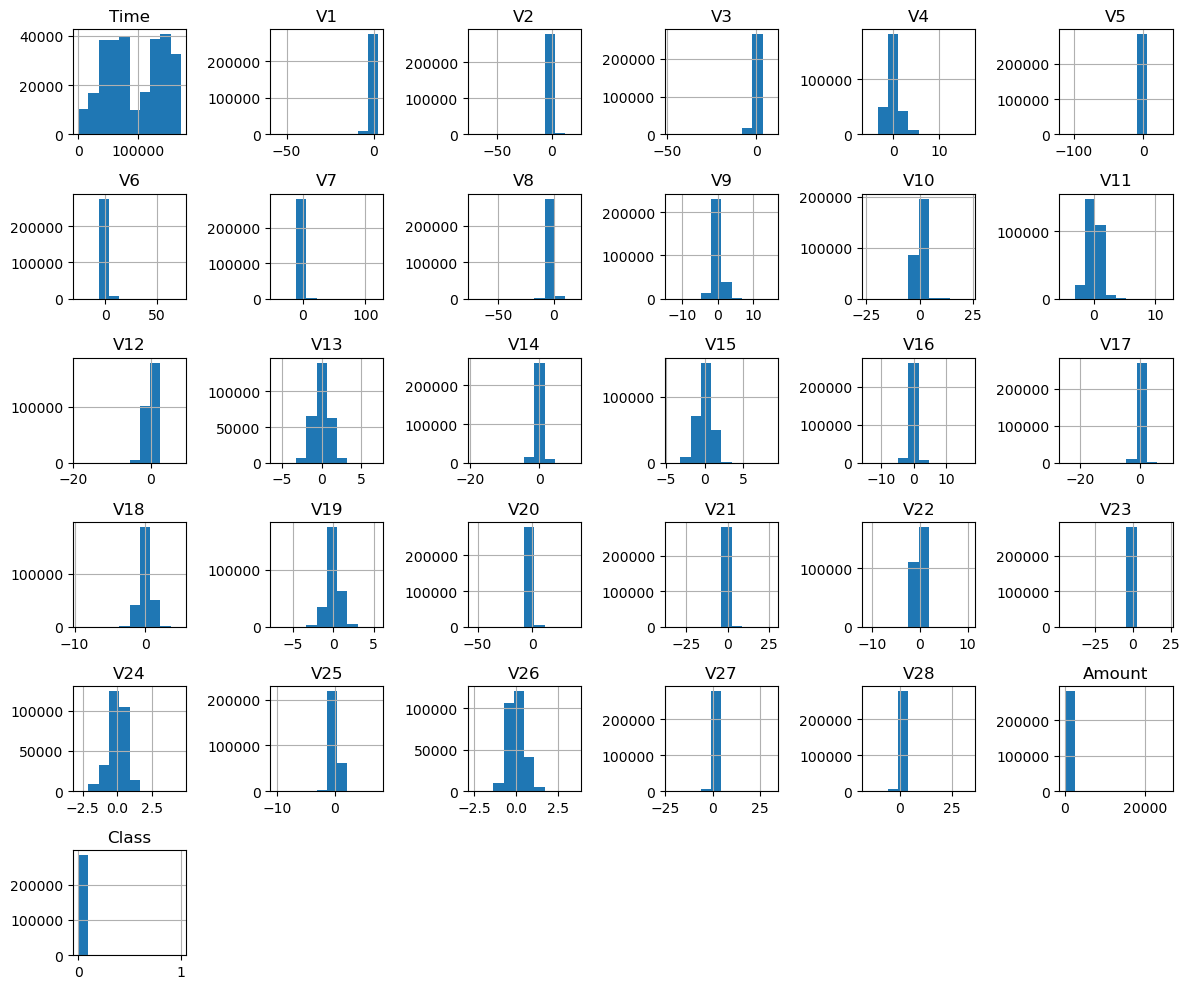

In [43]:
fig = plt.figure(figsize=(12,10))
card.hist(ax=fig)
plt.tight_layout()

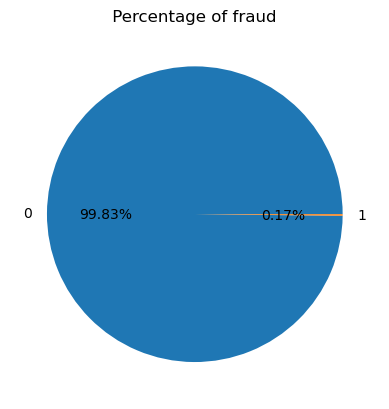

In [16]:
class_index=card.Class.value_counts().index
class_value=card.Class.value_counts().values
plt.pie(class_value,labels=class_index,autopct="%1.2f%%")
plt.title(' Percentage of fraud ')
plt.show()

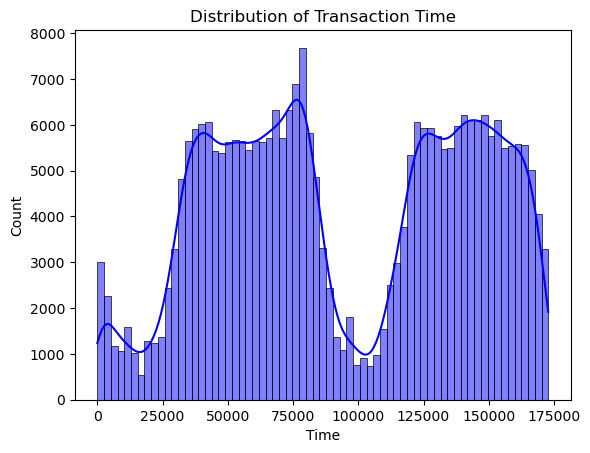

In [44]:
sns.histplot(data=card, x='Time', kde=True, color='blue')
plt.title("Distribution of Transaction Time")
plt.show()

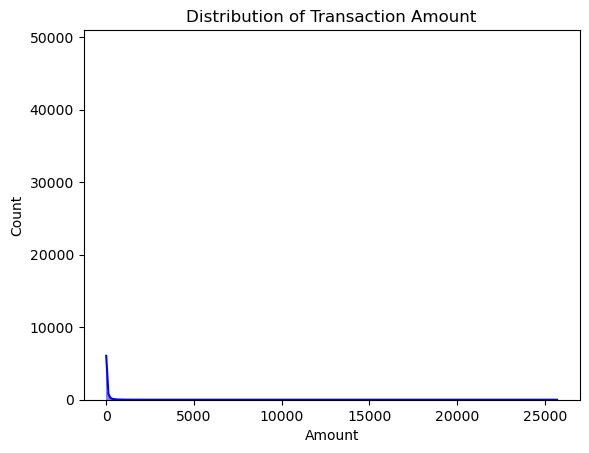

In [45]:
sns.histplot(data=card, x='Amount', kde=True, color='blue')
plt.title("Distribution of Transaction Amount")
plt.show()

In [19]:
# Get the Fraud and the normal dataset 
fraud = card[card['Class']==1]
normal = card[card['Class']==0]

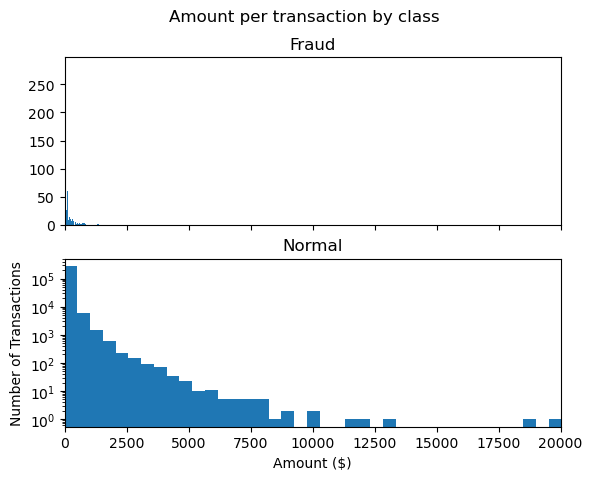

In [20]:
fig, axes = plt.subplots(2, 1, sharex=True)
fig.suptitle('Amount per transaction by class')

# Fraud transactions
axes[0].hist(fraud.Amount, bins=50)
axes[0].set_title('Fraud')

# Normal transactions
axes[1].hist(normal.Amount, bins=50)
axes[1].set_title('Normal')

# Shared labels and settings
plt.xlabel('Amount ($)')
axes[1].set_ylabel('Number of Transactions')
plt.xlim(0, 20000)
plt.yscale('log')

plt.show()


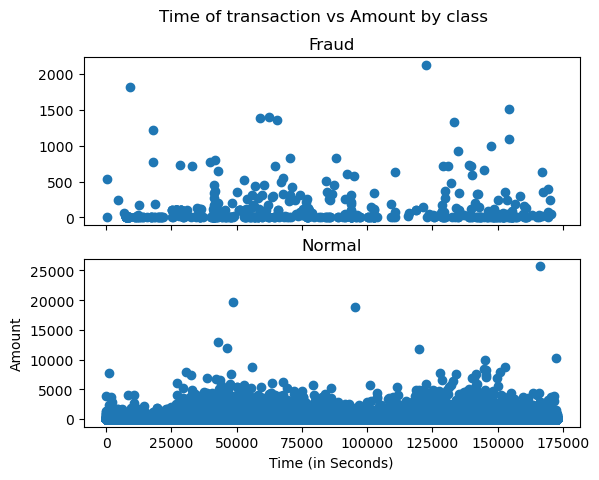

In [21]:
fig, axes = plt.subplots(2, 1, sharex=True)
fig.suptitle('Time of transaction vs Amount by class')

# Fraud transactions
axes[0].scatter(fraud.Time, fraud.Amount)
axes[0].set_title('Fraud')

# Normal transactions
axes[1].scatter(normal.Time, normal.Amount)
axes[1].set_title('Normal')

# Shared labels
plt.xlabel('Time (in Seconds)')
axes[1].set_ylabel('Amount')

plt.show()


The data is highly imbalanced, which is why the analysis results may not be as expected

In [22]:
data=card.copy()

In [23]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
x=data.drop('Class',axis=1)

In [25]:
y=data['Class']

FEATURE SCALING

In [26]:
from sklearn.preprocessing import StandardScaler
#  StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

1 -- Isolation Forest

In [28]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_iso = iso_forest.fit_predict(x_scaled)
y_pred_iso = [1 if p == -1 else 0 for p in y_pred_iso]

In [29]:
print("Isolation Forest Results:")
print(confusion_matrix(y, y_pred_iso))
print(classification_report(y, y_pred_iso))
accuracy_iso = accuracy_score(y, y_pred_iso)
print(f"Accuracy of Isolation Forest: {accuracy_iso:.4f}")

Isolation Forest Results:
[[255296  27957]
 [    57    416]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    283253
           1       0.01      0.88      0.03       473

    accuracy                           0.90    283726
   macro avg       0.51      0.89      0.49    283726
weighted avg       1.00      0.90      0.95    283726

Accuracy of Isolation Forest: 0.9013


2 -- Local Outlier Factor

In [30]:
# Local Outlier Factor 
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(x_scaled)
y_pred_lof = [1 if p == -1 else 0 for p in y_pred_lof]

In [31]:
print("Local Outlier Factor Results:")
print(confusion_matrix(y, y_pred_lof))
print(classification_report(y, y_pred_lof))
accuracy_lof = accuracy_score(y, y_pred_lof)
print(f"Accuracy of Local Outlier Factor: {accuracy_lof:.4f}")

Local Outlier Factor Results:
[[254947  28306]
 [   406     67]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    283253
           1       0.00      0.14      0.00       473

    accuracy                           0.90    283726
   macro avg       0.50      0.52      0.48    283726
weighted avg       1.00      0.90      0.95    283726

Accuracy of Local Outlier Factor: 0.8988


Isolation Forest is the better model in this case because it identifies a much larger portion of fraudulent transactions (higher recall),
which is critical in credit card fraud detection. Even though its precision is low, the ability to catch more fraudulent transactions makes
it a better than LOF

TESTING

In [33]:
import pickle
# Save  Isolation Forest model to a file
with open('isolation_forest_model.pkl', 'wb') as file:
    pickle.dump(iso_forest, file)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [34]:
# Load the Isolation Forest model from the file
with open('isolation_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load the scaler used for preprocessing (assuming it's saved similarly)
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [46]:
# Define the new input data
input_data = (0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388, 0.239599,0.09698,0.363787,
              0.090794,-0.551600,-0.617801,-0.991390,-0.311169, 1.468177,-0.470401,0.207971,0.025791,0.403993,
              0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000)
# Convert input data to numpy array and reshape for prediction
np_array = np.asarray(input_data).reshape(1, -1)

# Preprocess the input data (scaling)
np_array_scaled = scaler.transform(np_array)

# Predict with the loaded Isolation Forest model
prediction = loaded_model.predict(np_array_scaled)

# Interpret the prediction
if prediction[0] == -1:
    print('Had fraudulent credit card transactions')
else:
    print('Fraudulent credit card transactions not occurred')


Fraudulent credit card transactions not occurred


In [39]:
card.iloc[0]

Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Class       0.000000
Name: 0, dtype: float64

In [40]:
fraud.iloc[0]

Time      406.000000
V1         -2.312227
V2          1.951992
V3         -1.609851
V4          3.997906
V5         -0.522188
V6         -1.426545
V7         -2.537387
V8          1.391657
V9         -2.770089
V10        -2.772272
V11         3.202033
V12        -2.899907
V13        -0.595222
V14        -4.289254
V15         0.389724
V16        -1.140747
V17        -2.830056
V18        -0.016822
V19         0.416956
V20         0.126911
V21         0.517232
V22        -0.035049
V23        -0.465211
V24         0.320198
V25         0.044519
V26         0.177840
V27         0.261145
V28        -0.143276
Amount      0.000000
Class       1.000000
Name: 541, dtype: float64

In [47]:
# Define the new input data
input_data = (406.000000, -2.312227, 1.951992, -1.609851, 3.997906, -0.522188, 
              -1.426545, -2.537387, 1.391657, -2.770089, -2.772272, 3.202033, 
              -2.899907, -0.595222, -4.289254, 0.389724, -1.140747, -2.830056, 
              -0.016822, 0.416956, 0.126911, 0.517232, -0.035049, -0.465211, 
              0.320198, 0.044519, 0.177840, 0.261145, -0.143276, 0.000000)

# Convert input data to numpy array and reshape for prediction
np_array = np.asarray(input_data).reshape(1, -1)

# Preprocess the input data (scaling)
np_array_scaled = scaler.transform(np_array)

# Predict with the loaded Isolation Forest model
prediction = loaded_model.predict(np_array_scaled)

# Interpret the prediction
if prediction[0] == -1:
    print('Had fraudulent credit card transactions')
else:
    print('Fraudulent credit card transactions not occurred')


Had fraudulent credit card transactions


In [ ]:
# Model performing well